In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
DIR = "experiments/models"
EPOCH=8.6

In [43]:
def load_scores(filename, group_by=10):
    losses = []
    accs = []
    with open(filename, "r") as file:
        for line in file:
            loss = line.split()[0][:-1]
            accuracy = line.split()[1]
            losses.append(float(loss))
            accs.append(float(accuracy))
    
    losses = np.mean(np.array(losses).reshape(-1, group_by), axis=1)
    accs = np.mean(np.array(accs).reshape(-1, group_by), axis=1)
    return losses, accs

In [44]:
def plot_losses(losses, accs, title, scale=1):
    x_axis =  np.array(list(range(1, len(losses) + 1))) * scale / EPOCH
    fig, ax1 = plt.subplots(figsize=(10, 8))
    
    ax1.set(ylabel="Loss")
    ax1.plot(
        x_axis, losses, label="Loss", color="firebrick"
    )
    ax1.set(xlabel="Epoch")
    ax2 = ax1.twinx()
    ax2.plot(
        x_axis, accs, label="Prediction accuracy", color="mediumblue"
    )
    ax2.set(ylabel="Prediction accuracy")
    
    ax1.set_title(title)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="center right", framealpha=1)
     
    plt.grid(True)
    plt.savefig("losses.png")

In [45]:
# cat batch_job_knn.o1572368  | grep loss | cut -d " " -f 5,8 > loss.log

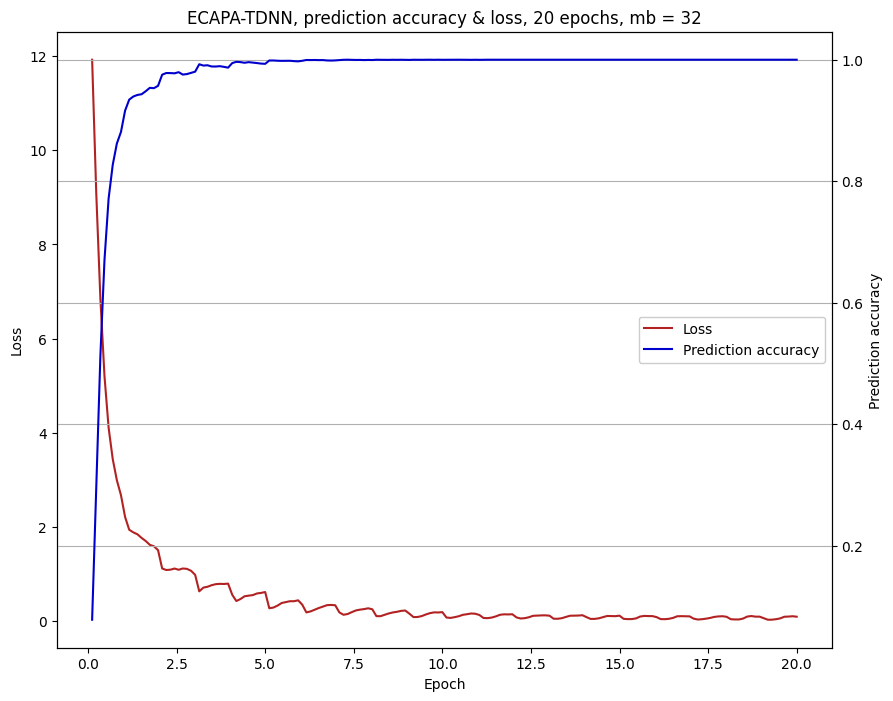

In [46]:
losses, accs = load_scores(f"{DIR}/ecapa20/loss.log", 10)
plot_losses(losses, accs, "ECAPA-TDNN, prediction accuracy & loss, 20 epochs, mb = 32")

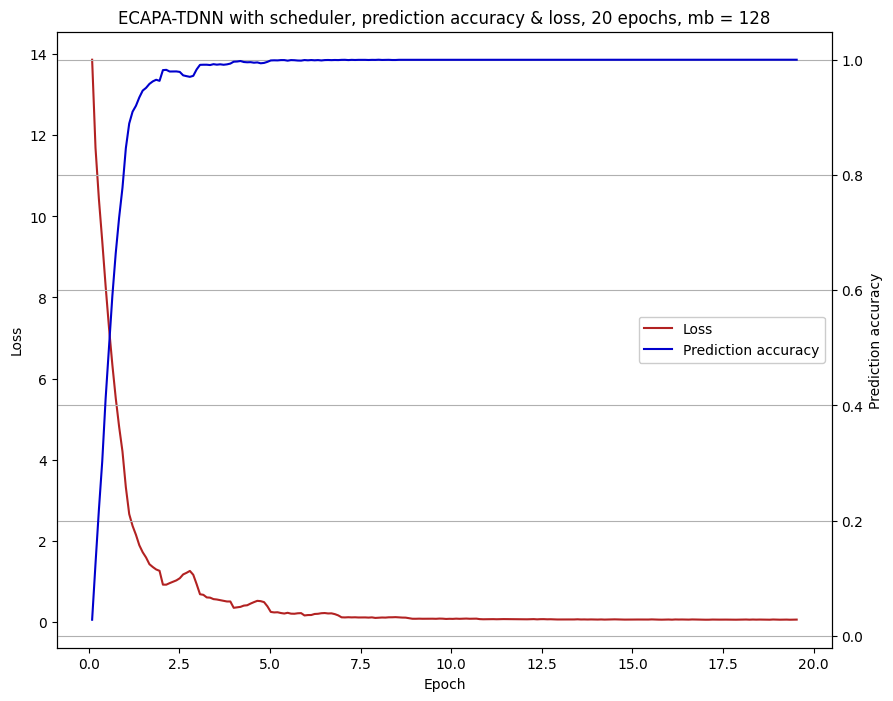

In [47]:
losses, accs = load_scores(f"{DIR}/ecapa-scheduler-10-09-07/loss.log", 2)
plot_losses(losses, accs, "ECAPA-TDNN with scheduler, prediction accuracy & loss, 20 epochs, mb = 128", 4/5)

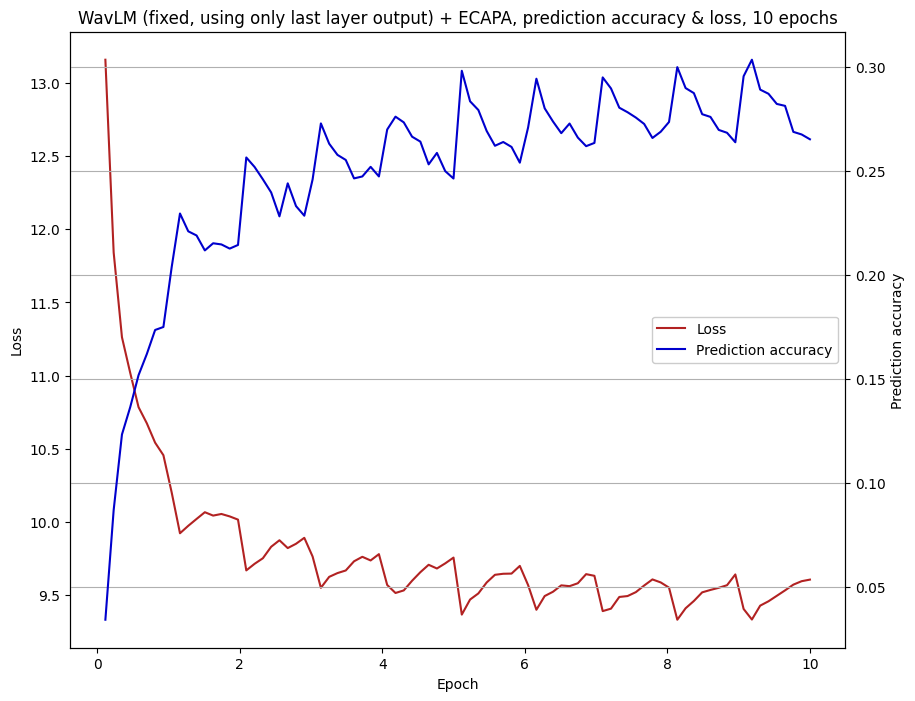

In [48]:
losses, accs = load_scores(f"{DIR}/wavlm-only-last/loss_accuracy.log", 20)
plot_losses(losses, accs, "WavLM (fixed, using only last layer output) + ECAPA, prediction accuracy & loss, 10 epochs")

43 86


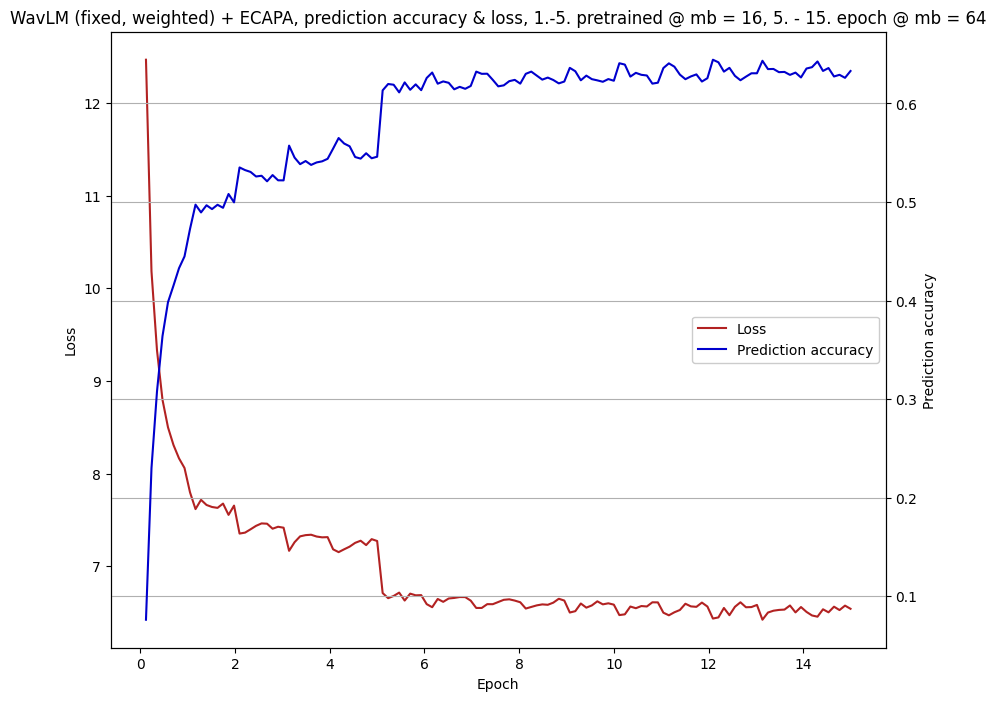

In [49]:
lf, accsf = load_scores(f"{DIR}/wavlm-first-five/loss_accuracy.log", 2 * 10)
losses, accs = load_scores("/home/milan/mit/knn/p/experiments/models/wavlm-weighted-64/loss_accuracy.log", 5)
print(lf.shape[0], losses.shape[0])
plot_losses(np.concatenate((lf, losses)), np.concatenate((accsf, accs)), "WavLM (fixed, weighted) + ECAPA, prediction accuracy & loss, 1.-5. pretrained @ mb = 16, 5. - 15. epoch @ mb = 64")

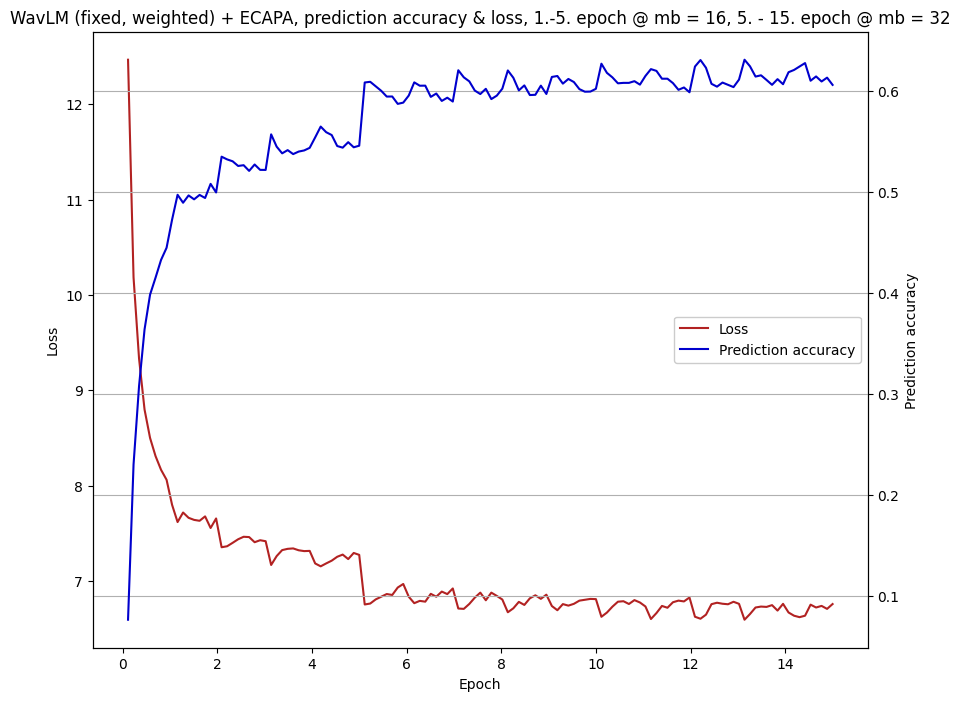

In [50]:
losses, accs = load_scores(f"{DIR}/wavlm-weighted-32/loss_accuracy.log", 10)
plot_losses(np.concatenate((lf, losses)), np.concatenate((accsf, accs)), "WavLM (fixed, weighted) + ECAPA, prediction accuracy & loss, 1.-5. epoch @ mb = 16, 5. - 15. epoch @ mb = 32")

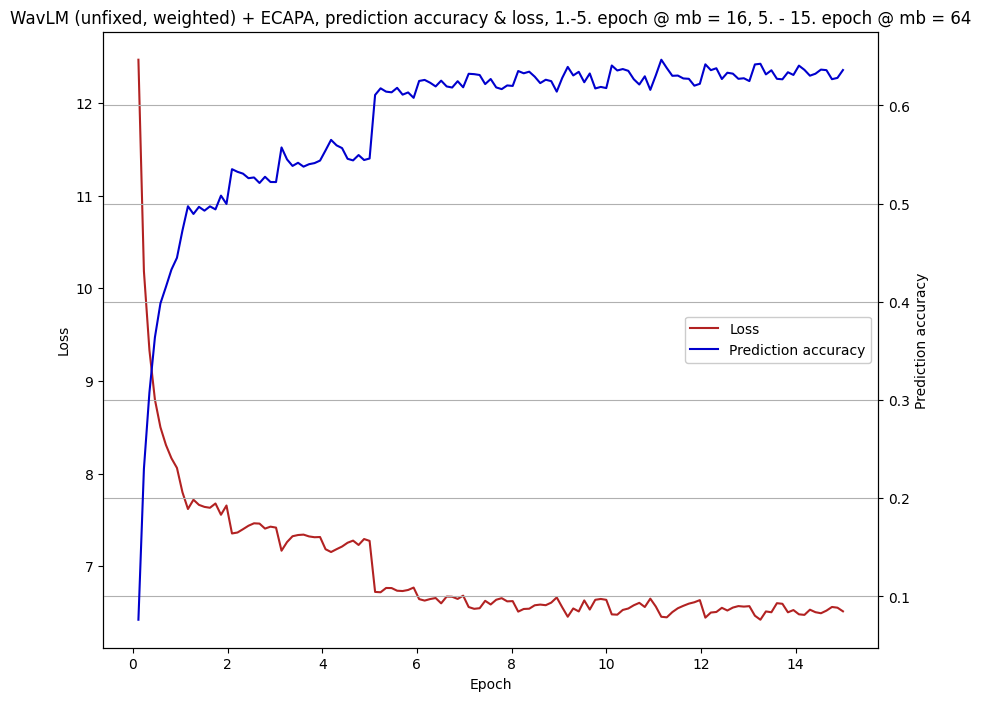

In [51]:
# Job 8583
losses, accs = load_scores(f"{DIR}/unfixed-15-no-scheduler-05-09-14-56/loss_accuracy.log", 5)
plot_losses(np.concatenate((lf, losses)), np.concatenate((accsf, accs)), "WavLM (unfixed, weighted) + ECAPA, prediction accuracy & loss, 1.-5. epoch @ mb = 16, 5. - 15. epoch @ mb = 64")